In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Change this line
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load Tour.csv into Tour_data
Tour_data = pd.read_csv('tourism_dataset.csv', delimiter=',')

# Display the first few rows of the dataset to verify
Tour_data.head

<bound method NDFrame.head of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                

In [3]:
X = Tour_data.drop(columns='Accommodation_Available', axis=1)  # Features: All columns except 'Accommodation_Available'
Y = Tour_data['Accommodation_Available']       

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=45
)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)  # Use RandomForestClassifier
rf_model.fit(X_train, Y_train)

# Predict the class labels
Y_pred = rf_model.predict(X_test)

# Calculate accuracy and classification metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5150250417362271
Precision: 0.5075885328836425
Recall: 0.5101694915254237
F1 Score: 0.5088757396449705


In [6]:
input_data_str = ['62', '0', '0', '140', '268', '0', '0', '160', '0', '3.6', '0', '2', '2'] 
input_data = np.array(input_data_str, dtype=float).reshape(1, -1)
input_df = pd.DataFrame(columns=X_train.columns)  
input_df.loc[0] = 0
input_df.iloc[0, :len(input_data[0])] = input_data[0] 
prediction = rf_model.predict(input_df)
if prediction[0] == 1:
    print("Accommodation is Available (Yes)")
else:
    print("Accommodation is Not Available (No)")


Accommodation is Available (Yes)


In [7]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']
Y = Y.map({'Yes': 1, 'No': 0}) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, Y_train)
filename = 'tour_data_rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
loaded_model = pickle.load(open('tour_data_rf_model.sav', 'rb'))
Y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
for column in X.columns:
    print(column)


Accuracy: 0.5150250417362271
Confusion Matrix:
 [[316 292]
 [289 301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52       608
           1       0.51      0.51      0.51       590

    accuracy                           0.52      1198
   macro avg       0.51      0.51      0.51      1198
weighted avg       0.52      0.52      0.52      1198

Location
Country
Category
Visitors
Rating
Revenue


In [8]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from memory_profiler import memory_usage
import pandas as pd

def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    max_size = len(data)
    sizes = [size for size in sizes if size <= max_size]
    
    for size in sizes:
        subset_data = data.sample(n=size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        start_time = time.time()
        start_memory = memory_usage()[0]
        
        rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
        rf_model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        memory_used = memory_usage()[0] - start_memory
        
        start_time = time.time()
        Y_pred = rf_model.predict(X_test)
        prediction_time = time.time() - start_time
        
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)
        
        print(f"Data Size: {size}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Prediction Time: {prediction_time:.4f} seconds")
        print(f"Memory Usage: {memory_used:.2f} MB")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Classification Report:\n{class_report}")
        print("-" * 50)

test_scalability(Tour_data)


Data Size: 500
Training Time: 0.5877 seconds
Prediction Time: 0.0273 seconds
Memory Usage: 2.56 MB
Accuracy: 0.4900
Precision: 0.4706
Recall: 0.6809
F1 Score: 0.5565
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.32      0.40        53
           1       0.47      0.68      0.56        47

    accuracy                           0.49       100
   macro avg       0.50      0.50      0.48       100
weighted avg       0.50      0.49      0.47       100

--------------------------------------------------
Data Size: 1000
Training Time: 1.0844 seconds
Prediction Time: 0.0336 seconds
Memory Usage: 1.28 MB
Accuracy: 0.4950
Precision: 0.5222
Recall: 0.4476
F1 Score: 0.4821
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.55      0.51        95
           1       0.52      0.45      0.48       105

    accuracy                           0.49       200
   macro avg       0.50  

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import pandas as pd

X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})

print("Unique values in 'Accommodation_Available':", Y.unique())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, Y_train)

Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Predicted Probabilities (first 10):", Y_pred_proba[:10])

threshold = 0.5
Y_pred_binary = (Y_pred_proba > threshold).astype(int)

print("Binary Predictions (first 10):", Y_pred_binary[:10])

precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision: {precision:.4f}")


Unique values in 'Accommodation_Available': [1 0]
Predicted Probabilities (first 10): [0.41 0.59 0.48 0.6  0.53 0.56 0.42 0.38 0.53 0.54]
Binary Predictions (first 10): [0 1 0 1 1 1 0 0 1 1]
Precision: 0.5076


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dataset = pd.read_csv('tourism_dataset.csv')
print("Dataset Columns:", dataset.columns)
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']
y = y.map({'Yes': 1, 'No': 0})
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Accuracy: 0.5150250417362271
Precision: 0.5075885328836425
Recall: 0.5101694915254237
F1 Score: 0.5088757396449705


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
dataset = pd.read_csv('tourism_dataset.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
Y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# -------------------------
# Fairness Analysis
# -------------------------
# Group-wise evaluation based on 'Country' (example)
if 'Country' in dataset.columns:
    groups = dataset['Country'].unique()
    print("\nFairness Analysis by 'Country':")
    for group in groups:
        group_data = dataset[dataset['Country'] == group]
        if not group_data.empty:
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available']
            Y_group = Y_group.map({'Yes': 1, 'No': 0})  # Convert to numeric

            # Convert categorical data to dummies
            X_group = pd.get_dummies(X_group, drop_first=True)

            # Align columns to match training data
            X_group = X_group.reindex(columns=X_train.columns, fill_value=0)

            # Predict for this group
            Y_group_pred = rf_model.predict(X_group)

            # Evaluate
            group_accuracy = accuracy_score(Y_group, Y_group_pred)
            group_precision = precision_score(Y_group, Y_group_pred)
            group_recall = recall_score(Y_group, Y_group_pred)
            group_f1 = f1_score(Y_group, Y_group_pred)

            print(f"Country: {group}")
            print(f"  Group Accuracy: {group_accuracy}")
            print(f"  Group Precision: {group_precision}")
            print(f"  Group Recall: {group_recall}")
            print(f"  Group F1 Score: {group_f1}")
else:
    print("No 'Country' column found for fairness analysis.")


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Accuracy: 0.5150250417362271
Precision: 0.5075885328836425
Recall: 0.5101694915254237
F1 Score: 0.5088757396449705

Fairness Analysis by 'Country':
Country: India
  Group Accuracy: 0.8995535714285714
  Group Precision: 0.9164733178654292
  Group Recall: 0.8797327394209354
  Group F1 Score: 0.8977272727272727
Country: USA
  Group Accuracy: 0.8915094339622641
  Group Precision: 0.9176470588235294
  Group Recall: 0.87248322147651
  Group F1 Score: 0.8944954128440367
Country: Brazil
  Group Accuracy: 0.888095238095238
  Group Precision: 0.903755868544601
  Group Recall: 0.8789954337899544
  Group F1 Score: 0.8912037037037037
Country: France
  Group Accuracy: 0.8833138856476079
  Group Precision: 0.8918269230769231
  Group Recall: 0.8708920187793427
  Group F1 Score: 0.8812351543942993
Country: Egypt
  Group Accuracy: 0.9111842105263158
  Group

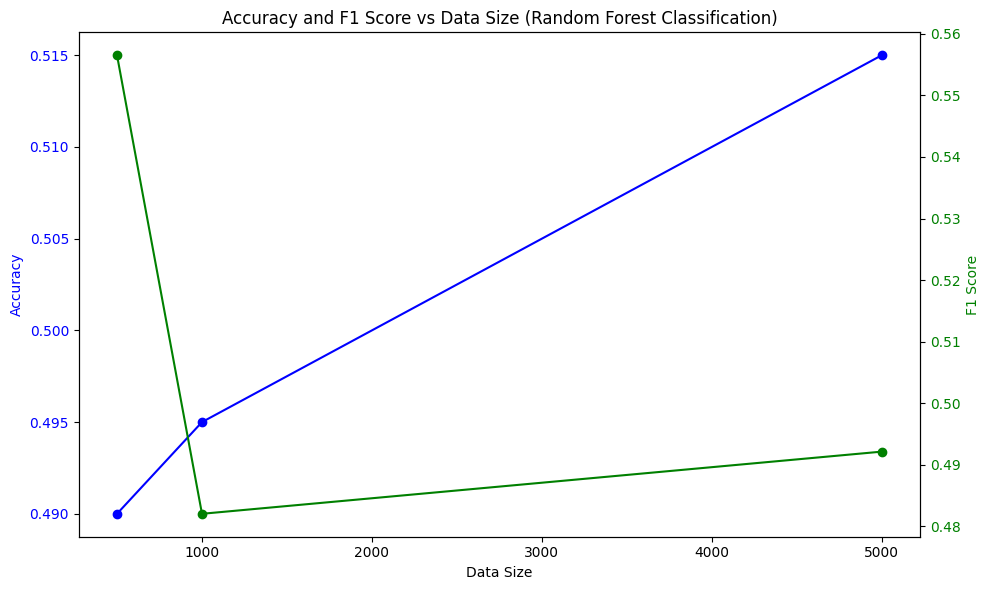

(0.5150250417362271,
 {'0': {'precision': 0.5223140495867769,
   'recall': 0.5197368421052632,
   'f1-score': 0.5210222588623248,
   'support': 608.0},
  '1': {'precision': 0.5075885328836425,
   'recall': 0.5101694915254237,
   'f1-score': 0.5088757396449705,
   'support': 590.0},
  'accuracy': 0.5150250417362271,
  'macro avg': {'precision': 0.5149512912352097,
   'recall': 0.5149531668153434,
   'f1-score': 0.5149489992536476,
   'support': 1198.0},
  'weighted avg': {'precision': 0.5150619169867356,
   'recall': 0.5150250417362271,
   'f1-score': 0.5150402502327429,
   'support': 1198.0}})

In [12]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report  

# Assuming the dataset is already loaded in 'Tour_data'  
# Verify the data's size  
data_size = len(Tour_data)  

# Define sample sizes based on the available data  
data_sizes = [500, 1000, 5000, 10000, 20000]  
data_sizes = [size for size in data_sizes if size <= data_size]  # Adjust if size exceeds data  

# Function to plot accuracy metrics (Accuracy and Classification Report)  
def plot_accuracy_metrics(subset_data):  
    X = subset_data.drop(columns=['Accommodation_Available'], axis=1)  
    Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})  

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)  
    X_train = pd.get_dummies(X_train, drop_first=True)  
    X_test = pd.get_dummies(X_test, drop_first=True)  
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

    # Initialize and train the Random Forest model  
    rf_model = RandomForestClassifier(random_state=45)  
    rf_model.fit(X_train, Y_train)  

    # Predict and evaluate  
    Y_pred = rf_model.predict(X_test)  
    accuracy = accuracy_score(Y_test, Y_pred)  

    # Generate classification report  
    report = classification_report(Y_test, Y_pred, output_dict=True)  

    return accuracy, report  

# Lists to store values for plotting  
accuracy_values = []  
f1_values = []  

# Loop through different data sizes and collect accuracy and F1 Score values  
for size in data_sizes:  
    subset_data = Tour_data.sample(n=size, random_state=42)  # Sample data  
    accuracy, report = plot_accuracy_metrics(subset_data)  
    accuracy_values.append(accuracy)  
    f1_values.append(report['1']['f1-score'])  # F1 score for class 'Yes'  

# Plot both metrics on a single graph  
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Plot accuracy on the left y-axis  
ax1.set_xlabel('Data Size')  
ax1.set_ylabel('Accuracy', color='b')  
ax1.plot(data_sizes, accuracy_values, marker='o', color='b', label='Accuracy')  
ax1.tick_params(axis='y', labelcolor='b')  

# Create a second y-axis for F1 Score  
ax2 = ax1.twinx()  
ax2.set_ylabel('F1 Score', color='g')  
ax2.plot(data_sizes, f1_values, marker='o', color='g', label='F1 Score for Class Yes')  
ax2.tick_params(axis='y', labelcolor='g')  

# Add a title and show the plot  
plt.title('Accuracy and F1 Score vs Data Size (Random Forest Classification)')  
fig.tight_layout()  
plt.show()
df = pd.read_csv('tourism_dataset.csv')
plot_accuracy_metrics(df)

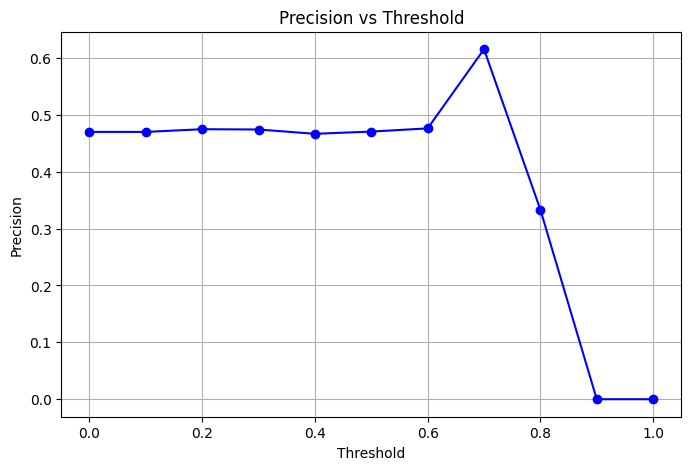

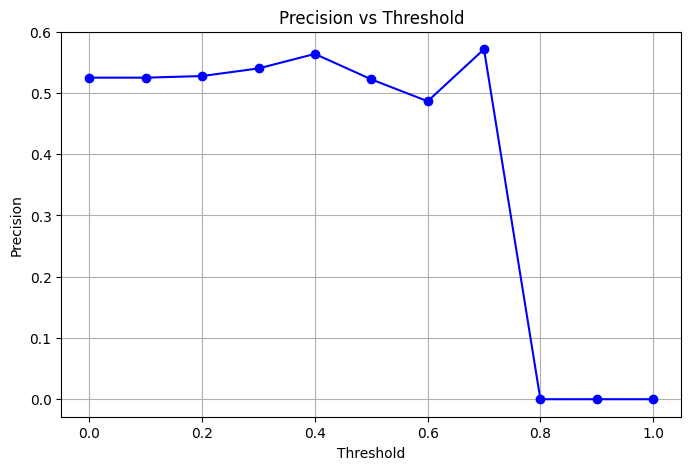

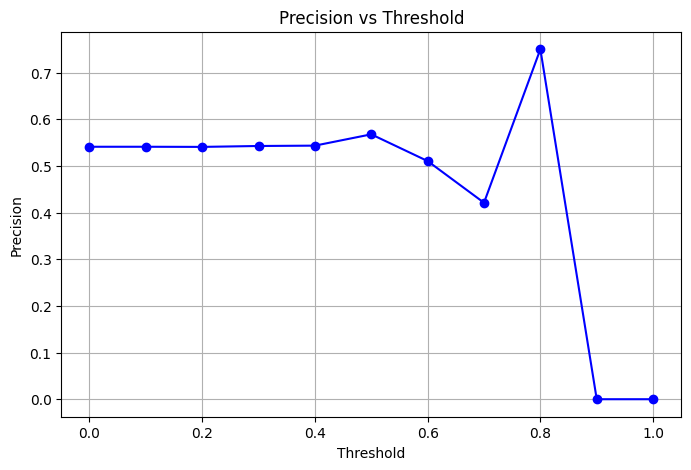

In [13]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report, precision_score  

# Assuming the dataset is already loaded in 'Tour_data'  
# Verify the data's size  
data_size = len(Tour_data)  

# Define sample sizes based on the available data  
data_sizes = [500, 1000, 5000, 10000, 20000]  
data_sizes = [size for size in data_sizes if size <= data_size]  # Adjust if size exceeds data  

# Function to plot accuracy metrics (Accuracy and Classification Report)  
def plot_accuracy_metrics(subset_data):  
    X = subset_data.drop(columns=['Accommodation_Available'], axis=1)  
    Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})  

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)  
    X_train = pd.get_dummies(X_train, drop_first=True)  
    X_test = pd.get_dummies(X_test, drop_first=True)  
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

    # Initialize and train the Random Forest model  
    rf_model = RandomForestClassifier(random_state=45)  
    rf_model.fit(X_train, Y_train)  

    # Predict probabilities and evaluate  
    Y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class  
    Y_pred = rf_model.predict(X_test)  
    
    accuracy = accuracy_score(Y_test, Y_pred)  
    report = classification_report(Y_test, Y_pred, output_dict=True)  

    return accuracy, report, Y_test, Y_pred_prob  

# Function to calculate precision at different thresholds  
def plot_precision(Y_test, Y_pred_prob):  
    thresholds = np.arange(0.0, 1.1, 0.1)  # From 0 to 1 in increments of 0.1  
    precisions = []  

    for threshold in thresholds:  
        Y_pred_binary = (Y_pred_prob > threshold).astype(int)  
        precision = precision_score(Y_test, Y_pred_binary)  
        precisions.append(precision)  

    # Plot Precision vs Threshold  
    plt.figure(figsize=(8, 5))  
    plt.plot(thresholds, precisions, marker='o', linestyle='-', color='b')  
    plt.title('Precision vs Threshold')  
    plt.xlabel('Threshold')  
    plt.ylabel('Precision')  
    plt.grid(True)  
    plt.show()  

# Lists to store values for plotting  
accuracy_values = []  
f1_values = []  

# Loop through different data sizes and collect accuracy and F1 Score values  
for size in data_sizes:  
    subset_data = Tour_data.sample(n=size, random_state=42)  # Sample data  
    accuracy, report, Y_test, Y_pred_prob = plot_accuracy_metrics(subset_data)  
    accuracy_values.append(accuracy)  
    f1_values.append(report['1']['f1-score'])  # F1 score for class 'Yes'  

    # Call the precision plotting function  
    plot_precision(Y_test, Y_pred_prob)  

# You can still plot size vs accuracy and F1 score if desired, as done previously

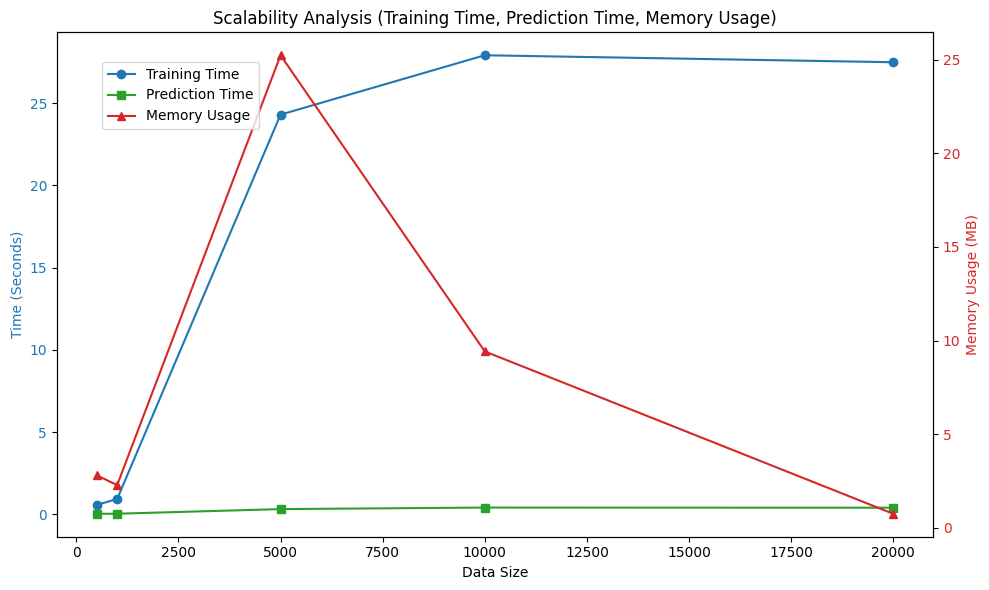

In [14]:
import time  
import psutil  
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
import pandas as pd  

# Function to track memory usage  
def memory_usage_psutil():  
    process = psutil.Process()  
    return process.memory_info().rss / 1024 ** 2  # in MB  

# Function to test scalability with an adjustment to sample sizes  
def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):  
    # Lists to store performance metrics  
    train_times = []  
    pred_times = []  
    memory_usage_list = []  
    
    # Check the size of the data  
    data_size = len(data)  
    
    for size in sizes:  
        # Adjust the sample size if it exceeds the data size  
        sample_size = min(size, data_size)  
        
        subset_data = data.sample(n=sample_size, random_state=42)  
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)  
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})  
        
        # Split the data into training and test sets  
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)  
        X_train = pd.get_dummies(X_train, drop_first=True)  
        X_test = pd.get_dummies(X_test, drop_first=True)  
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  
        
        # Measure time and memory usage  
        start_time = time.time()  
        start_memory = memory_usage_psutil()  

        # Initialize and train the Random Forest model  
        model = RandomForestClassifier(random_state=45)  
        model.fit(X_train, Y_train)  
        training_time = time.time() - start_time  
        
        # Measure memory usage during training  
        memory_used = memory_usage_psutil() - start_memory  
        
        # Predict and measure prediction time  
        start_time = time.time()  
        Y_pred = model.predict(X_test)  
        prediction_time = time.time() - start_time  
        
        train_times.append(training_time)  
        pred_times.append(prediction_time)  
        memory_usage_list.append(memory_used)  

    # Plot the results  
    fig, ax1 = plt.subplots(figsize=(10, 6))  

    # Plot training time and prediction time  
    ax1.set_xlabel('Data Size')  
    ax1.set_ylabel('Time (Seconds)', color='tab:blue')  
    ax1.plot(sizes, train_times, label='Training Time', color='tab:blue', marker='o')  
    ax1.plot(sizes, pred_times, label='Prediction Time', color='tab:green', marker='s')  
    ax1.tick_params(axis='y', labelcolor='tab:blue')  

    # Create a second y-axis to plot memory usage  
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')  
    ax2.plot(sizes, memory_usage_list, label='Memory Usage', color='tab:red', marker='^')  
    ax2.tick_params(axis='y', labelcolor='tab:red')  

    # Add titles and legends  
    ax1.set_title('Scalability Analysis (Training Time, Prediction Time, Memory Usage)')  
    fig.tight_layout()  
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  

    plt.show()  

# Test scalability with data sizes  
test_scalability(Tour_data)

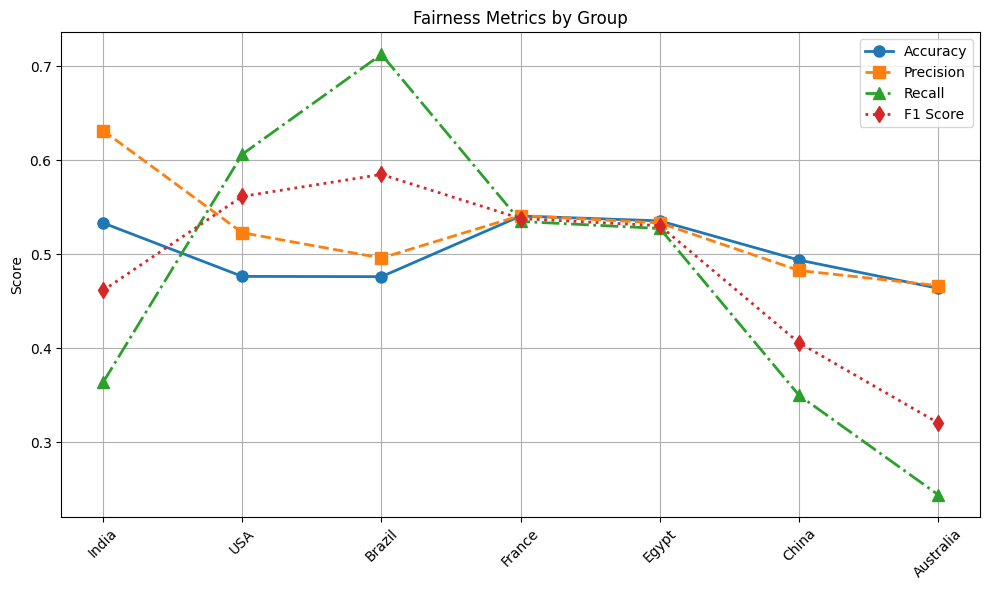

In [16]:
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
import pandas as pd  

def plot_fairness_by_group(data, group_column='Country'):  
    accuracy_groupwise = []  
    precision_groupwise = []  
    recall_groupwise = []  
    f1_groupwise = []  
    
    if group_column in data.columns:  
        groups = data[group_column].unique()  
        for group in groups:  
            group_data = data[data[group_column] == group]  
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)  
            Y_group = group_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})  
            
            # Split data into training and testing sets  
            X_train, X_test, Y_train, Y_test = train_test_split(X_group, Y_group, test_size=0.2, random_state=42)  
            X_train = pd.get_dummies(X_train, drop_first=True)  
            X_test = pd.get_dummies(X_test, drop_first=True)  
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  
            
            # Train the Random Forest model  
            model = RandomForestClassifier(random_state=42)  
            model.fit(X_train, Y_train)  
            Y_pred = model.predict(X_test)  

            # Calculate metrics  
            accuracy = accuracy_score(Y_test, Y_pred)  
            precision = precision_score(Y_test, Y_pred)  
            recall = recall_score(Y_test, Y_pred)  
            f1 = f1_score(Y_test, Y_pred)  
            
            accuracy_groupwise.append(accuracy)  
            precision_groupwise.append(precision)  
            recall_groupwise.append(recall)  
            f1_groupwise.append(f1)  

        # Plot combined fairness metrics per group  
        plt.figure(figsize=(10, 6))  
        x = range(len(groups))  # Use range for x-axis  

        plt.plot(x, accuracy_groupwise, label='Accuracy', marker='o', linestyle='-', linewidth=2, markersize=8)  
        plt.plot(x, precision_groupwise, label='Precision', marker='s', linestyle='--', linewidth=2, markersize=8)  
        plt.plot(x, recall_groupwise, label='Recall', marker='^', linestyle='-.', linewidth=2, markersize=8)  
        plt.plot(x, f1_groupwise, label='F1 Score', marker='d', linestyle=':', linewidth=2, markersize=8)  

        plt.xticks(x, groups, rotation=45)  
        plt.ylabel('Score')  
        plt.title('Fairness Metrics by Group')  
        plt.legend()  
        plt.grid(True)  
        plt.tight_layout()  
        plt.show()  
    else:  
        print(f"Column '{group_column}' not found in data.")  
  
df = pd.read_csv('tourism_dataset.csv')
plot_fairness_by_group(df)

Run 1/10
Run 1 completed - Accuracy: 0.48914858096828046, Precision: 0.4928825622775801, Recall: 0.4586092715231788, F1: 0.4751286449399657
Run 2/10
Run 2 completed - Accuracy: 0.48664440734557596, Precision: 0.48674242424242425, Recall: 0.4276206322795341, F1: 0.4552701505757307
Run 3/10
Run 3 completed - Accuracy: 0.5091819699499165, Precision: 0.5262172284644194, Recall: 0.45616883116883117, F1: 0.48869565217391303
Run 4/10
Run 4 completed - Accuracy: 0.511686143572621, Precision: 0.5102389078498294, Recall: 0.5008375209380235, F1: 0.5054945054945055
Run 5/10
Run 5 completed - Accuracy: 0.5091819699499165, Precision: 0.5049019607843137, Recall: 0.5202020202020202, F1: 0.5124378109452736
Run 6/10
Run 6 completed - Accuracy: 0.505008347245409, Precision: 0.4878048780487805, Recall: 0.5545927209705372, F1: 0.519059205190592
Run 7/10
Run 7 completed - Accuracy: 0.49248747913188645, Precision: 0.4878444084278768, Recall: 0.5075885328836425, F1: 0.4975206611570248
Run 8/10
Run 8 completed

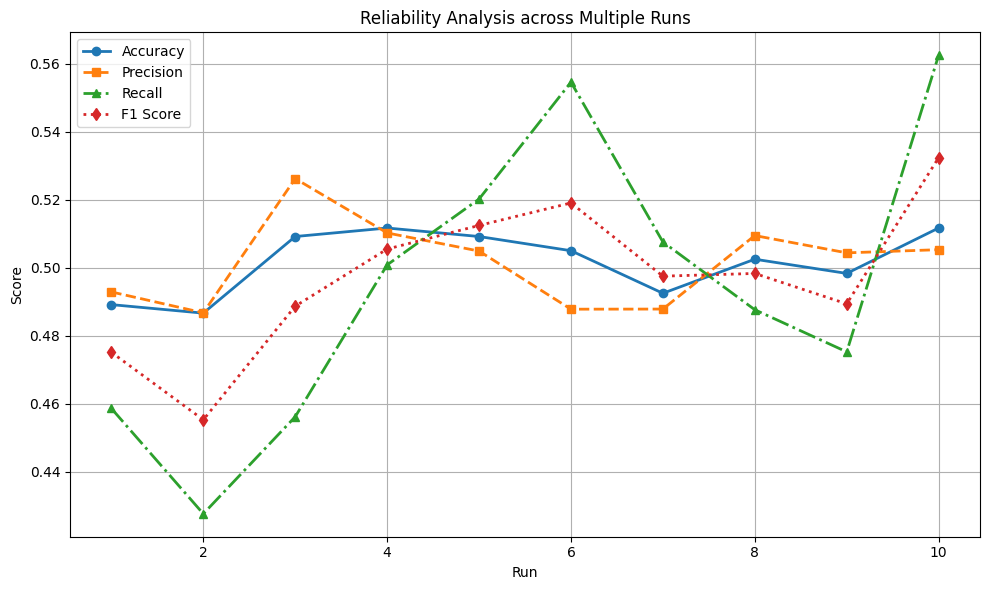

In [17]:
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
import pandas as pd  

# Function to check model reliability over multiple runs  
def plot_reliability(data, num_runs=10):  
    accuracy_scores = []  
    precision_scores = []  
    recall_scores = []  
    f1_scores = []  
    
    for run in range(num_runs):  
        print(f"Run {run + 1}/{num_runs}")  # Print which run is being processed  
        X = data.drop(columns=['Accommodation_Available'], axis=1)  
        Y = data['Accommodation_Available'].map({'Yes': 1, 'No': 0})  

        # Split data into training and test sets  
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run)  # Change random_state to vary splits  
        
        X_train = pd.get_dummies(X_train, drop_first=True)  
        X_test = pd.get_dummies(X_test, drop_first=True)  
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  
        
        # Initialize and train the model  
        model = RandomForestClassifier(random_state=42)  
        model.fit(X_train, Y_train)  

        # Predict and evaluate  
        Y_pred = model.predict(X_test)  
        
        accuracy = accuracy_score(Y_test, Y_pred)  
        precision = precision_score(Y_test, Y_pred)  
        recall = recall_score(Y_test, Y_pred)  
        f1 = f1_score(Y_test, Y_pred)  

        # Store scores  
        accuracy_scores.append(accuracy)  
        precision_scores.append(precision)  
        recall_scores.append(recall)  
        f1_scores.append(f1)  
        
        print(f"Run {run + 1} completed - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")  # Print the scores of each run  

    # Plot combined scores across multiple runs  
    plt.figure(figsize=(10, 6))  
    runs = range(1, num_runs + 1)  

    plt.plot(runs, accuracy_scores, label='Accuracy', marker='o', linestyle='-', linewidth=2)  
    plt.plot(runs, precision_scores, label='Precision', marker='s', linestyle='--', linewidth=2)  
    plt.plot(runs, recall_scores, label='Recall', marker='^', linestyle='-.', linewidth=2)  
    plt.plot(runs, f1_scores, label='F1 Score', marker='d', linestyle=':', linewidth=2)  

    plt.xlabel('Run')  
    plt.ylabel('Score')  
    plt.title('Reliability Analysis across Multiple Runs')  
    plt.legend()  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show()  
df = pd.read_csv('tourism_dataset.csv')
plot_reliability(df)
                 